In [208]:
# !git clone https://github.com/JJGO/UniverSeg
# !python -m pip install -r ./UniverSeg/requirements.txt

In [209]:
import math
import itertools

from tqdm.auto import tqdm
import numpy as np
import matplotlib.pyplot as plt

import einops as E
import cv2
from glob import glob


In [210]:
import sys
sys.path.append('UniverSeg')

import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'

from universeg import universeg
model = universeg(pretrained=True)
_ = model.to(device)

In [211]:
def visualize_tensors(tensors, col_wrap=8, col_names=None, title=None):
    M = len(tensors)
    N = len(next(iter(tensors.values())))
    
    cols = col_wrap
    rows = math.ceil(N/cols) * M

    d = 2.5
    fig, axes = plt.subplots(rows, cols, figsize=(d*cols, d*rows))
    if rows == 1:
      axes = axes.reshape(1, cols)
    
    for g, (grp, tensors) in enumerate(tensors.items()):
        for k, tensor in enumerate(tensors):
            col = k % cols
            row = g + M*(k//cols)
            x = tensor.detach().cpu().numpy().squeeze()            
            ax = axes[row,col]
            if len(x.shape) == 2:
                ax.imshow(x,vmin=0, vmax=1, cmap='gray')
            else:
                ax.imshow(E.rearrange(x,'C H W -> H W C'))
            if col == 0:
                ax.set_ylabel(grp, fontsize=16)
            if col_names is not None and row == 0:
                ax.set_title(col_names[col])

    for i in range(rows):
        for j in range(cols):
            ax = axes[i,j]
            ax.grid(False)
            ax.set_xticks([])
            ax.set_yticks([])
    
    if title:
        plt.suptitle(title, fontsize=20)
            
    plt.tight_layout()

In [212]:
# Custom Dataset
support_num=65
original_list=sorted(glob("img/new_size_original/*.JPG"))
eyelid_list=sorted(glob("img/new_size_glands/*.png"))

# original_list=sorted(glob("./chaos/new_dcms/*.jpg"))
# eyelid_list=sorted(glob("./chaos/new_pngs/*.png"))


support_list= []
support_eyelid_list= []
d_test=[]
d_support=[]


for i in range(support_num):

    if i< support_num-10:
        
        org_img=cv2.imread(original_list[i],flags=cv2.IMREAD_GRAYSCALE)
        eyelid_img=cv2.imread(eyelid_list[i],flags=cv2.IMREAD_GRAYSCALE)
    
        support_list.append(torch.from_numpy(org_img.astype(np.float32)/255).unsqueeze(0))
        support_eyelid_list.append(torch.from_numpy(eyelid_img.astype(np.float32)/255).unsqueeze(0))

        d_support.append((torch.from_numpy(org_img.astype(np.float32)/255).unsqueeze(0),
                            torch.from_numpy(eyelid_img.astype(np.float32)/255).unsqueeze(0)))  

    else:

        test_img= cv2.imread(original_list[i],flags=cv2.IMREAD_GRAYSCALE)
        test_label_img= cv2.imread(eyelid_list[i],flags=cv2.IMREAD_GRAYSCALE) 
        d_test.append((torch.from_numpy(test_img.astype(np.float32)/255).unsqueeze(0),
                            torch.from_numpy(test_label_img.astype(np.float32)/255).unsqueeze(0)))  


support_images=torch.stack(support_list,0).to(device)
support_labels=torch.stack(support_eyelid_list,0).to(device)


In [213]:
#visualize support images and labels
# n_viz = 10
# visualize_tensors({
#     'Support Image': support_images[:n_viz],
#     'Support Label': support_labels[:n_viz],
# }, col_wrap=10, title='Support Set Examples')

In [214]:
# # image predictions
# for idx in range(len(d_test)):
# # idx = np.random.permutation(len(d_test))[0]
#     image, label = d_test[idx]
#     image, label = image.to(device), label.to(device)

#     # run inference
#     logits = model(image[None], support_images[None], support_labels[None])[0].to(device)
#     pred = torch.sigmoid(logits)

#     # visualize
#     res = {'data': [image, label, pred, pred > 0.5]}
#     titles = col_names=['image', 'label', 'pred (soft)', 'pred (hard)']
#     visualize_tensors(res, col_wrap=4, col_names=titles)

In [215]:
# # Custom Dataset
# support_num=20
# original_list=sorted(glob("img/new_size_original/*.JPG"))
# eyelid_list=sorted(glob("img/new_size_glands/*.png"))
# raw_list=sorted(glob("img/new_size_raw/*.jpeg"))

# # original_list=sorted(glob("./chaos/new_dcms/*.jpg"))
# # eyelid_list=sorted(glob("./chaos/new_pngs/*.png"))


# support_list= []
# support_eyelid_list= []
# d_test_list=[]


# for i in range(support_num):

  
        
#     org_img=cv2.imread(original_list[i],flags=cv2.IMREAD_GRAYSCALE)
#     eyelid_img=cv2.imread(eyelid_list[i],flags=cv2.IMREAD_GRAYSCALE)

#     support_list.append(torch.from_numpy(org_img.astype(np.float32)/255).unsqueeze(0))
#     support_eyelid_list.append(torch.from_numpy(eyelid_img.astype(np.float32)/255).unsqueeze(0))

   

#     test_img= cv2.imread(raw_list[i],flags=cv2.IMREAD_GRAYSCALE)
#     # test_label_img= cv2.imread(eyelid_list[i],flags=cv2.IMREAD_GRAYSCALE) 
#     d_test_list.append((torch.from_numpy(test_img.astype(np.float32)/255).unsqueeze(0)))  


# support_images=torch.stack(support_list,0).to(device)
# support_labels=torch.stack(support_eyelid_list,0).to(device)
# d_test=d_test_list


In [216]:
# # Loop through test images
# for image in d_test:
#     # Move the test image to the device (assuming you are using a GPU)
#     image = image.to(device)

#     # Run inference
#     logits = model(image[None], support_images[None], support_labels[None])[0].to(device)
#     pred = torch.sigmoid(logits)

#     # Visualize the results
#     res = {'data': [image, pred, pred > 0.5]}  # Remove 'label' since we don't have it anymore
#     titles = col_names = ['image', 'pred (soft)', 'pred (hard)']  # Update column names
#     visualize_tensors(res, col_wrap=3, col_names=titles)


In [217]:
# Dice metric for measuring volume agreement
def dice_score(y_pred: torch.Tensor, y_true: torch.Tensor) -> float:
    y_pred = y_pred.long()
    y_true = y_true.long()
    score = 2*(y_pred*y_true).sum() / (y_pred.sum() + y_true.sum())
    return score.item()

In [218]:
# run inference and compute losses for one test image
@torch.no_grad()
def inference(model, image, label, support_images, support_labels):
    image, label = image.to(device), label.to(device)

    # inference
    logits = model(
        image[None],
        support_images[None],
        support_labels[None]
    )[0] # outputs are logits        

    soft_pred = torch.sigmoid(logits)
    hard_pred = soft_pred.round().clip(0,1)

    #  score
    score = dice_score(hard_pred, label)

    # return a dictionary of all relevant variables
    return {'Image': image,
            'Soft Prediction': soft_pred,
            'Prediction': hard_pred,
            'Ground Truth': label,
            'score': score}

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:35<00:00,  3.54s/it]


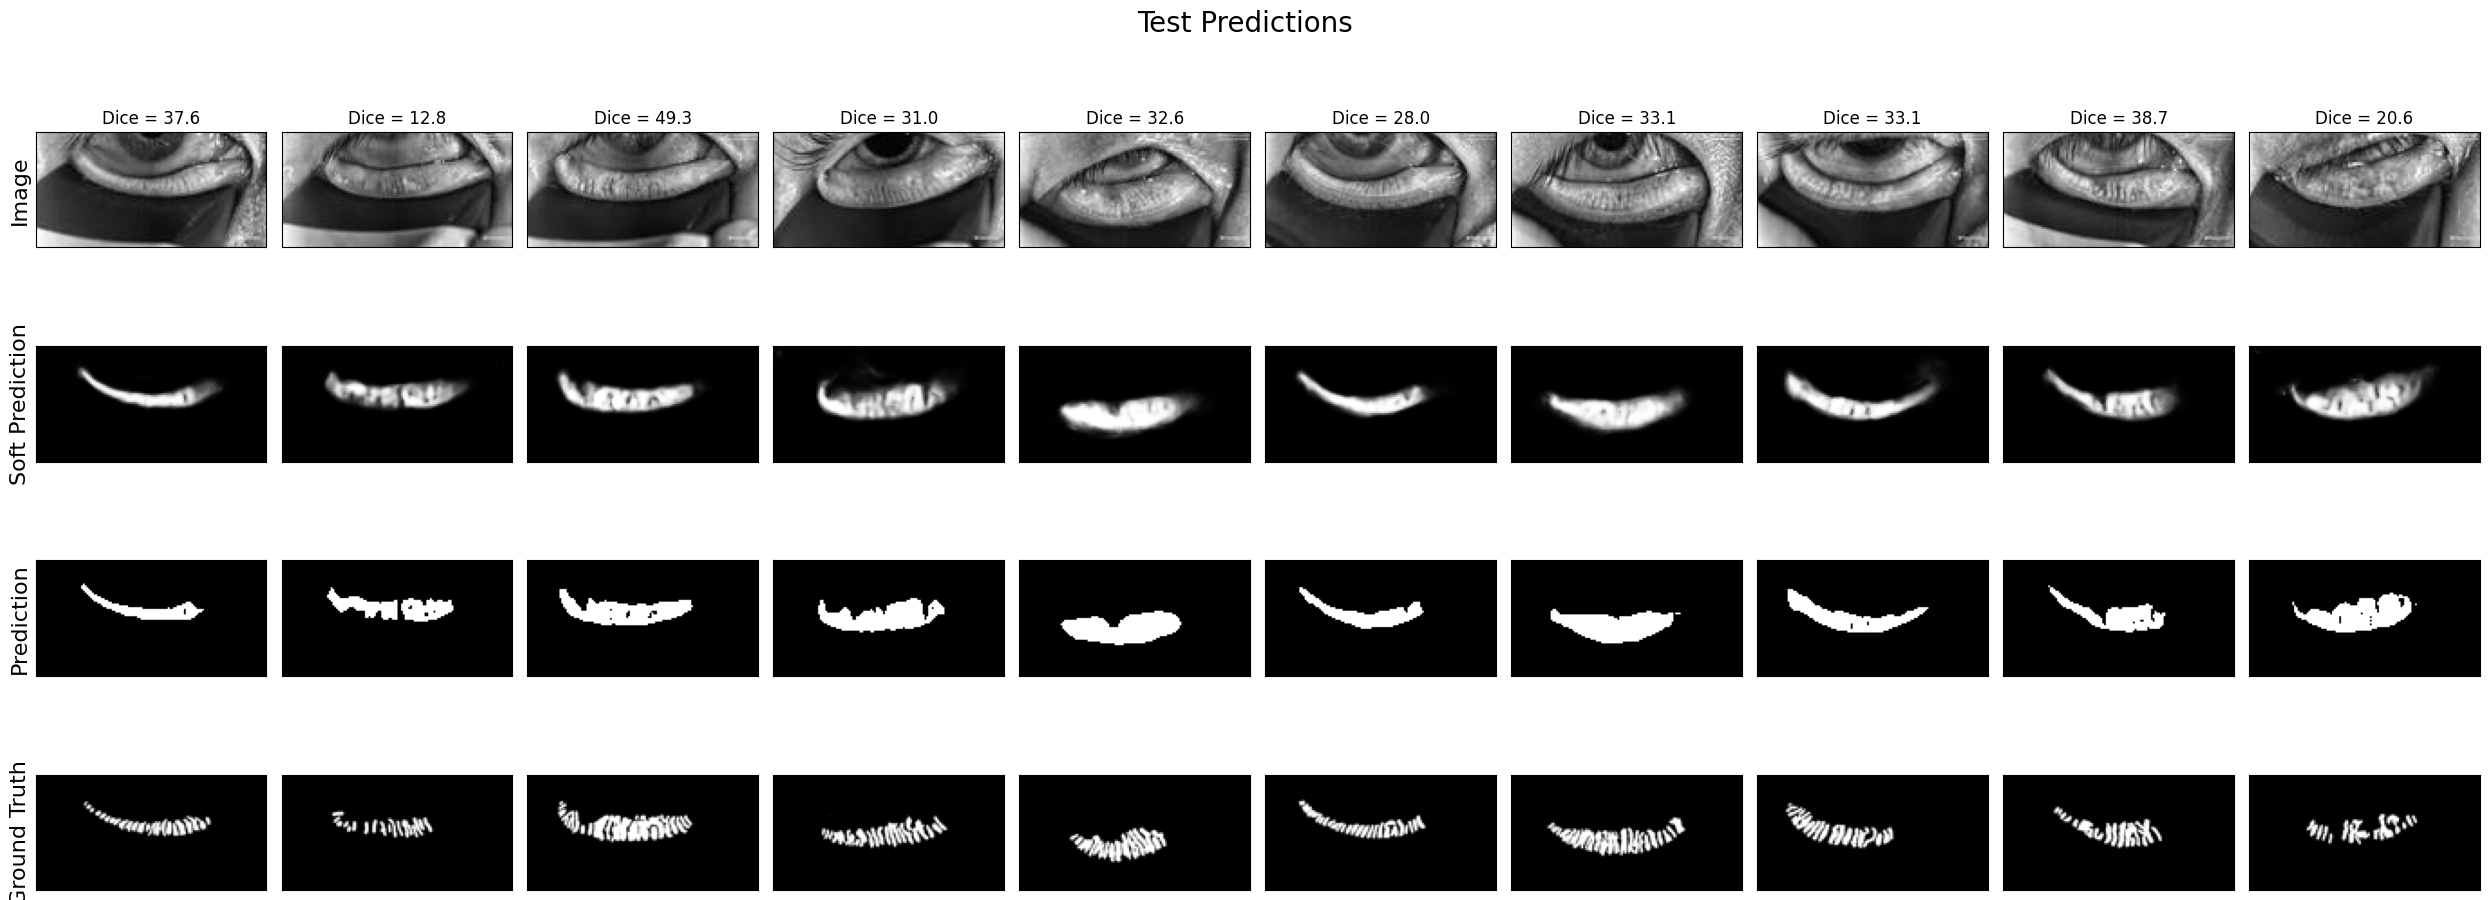

In [219]:
#predictions
from collections import defaultdict

n_predictions = 10

results = defaultdict(list)

# compute inference and save predictions and metrics for n_predictions
idxs = np.random.permutation(len(d_test))[:n_predictions]

for i in tqdm(idxs):
    image, label = d_test[i]
    vals = inference(model, image, label,support_images, support_labels)
    for k, v in vals.items():
        results[k].append(v)
    
# visualize the results, along with their scores
scores = results.pop('score')    
visualize_tensors(results, 
                  col_names=[f'Dice = {100*s:.1f}' for s in scores], 
                  title='Test Predictions', 
                  col_wrap=n_predictions)

In [220]:
# n_predictions = 10

# results = defaultdict(list)

# idxs = np.random.permutation(len(d_test))[:n_predictions]
# for i in tqdm(idxs):
#     image= d_test[i]
#     vals = inference(model, label,image, support_images, support_labels)
#     for k, v in vals.items():
#         results[k].append(v)
    
# scores = results.pop('score')    
# visualize_tensors(results, col_names=[f'Dice = {100*s:.1f}' for s in scores], title='Test Predictions - Different Label', col_wrap=n_predictions)

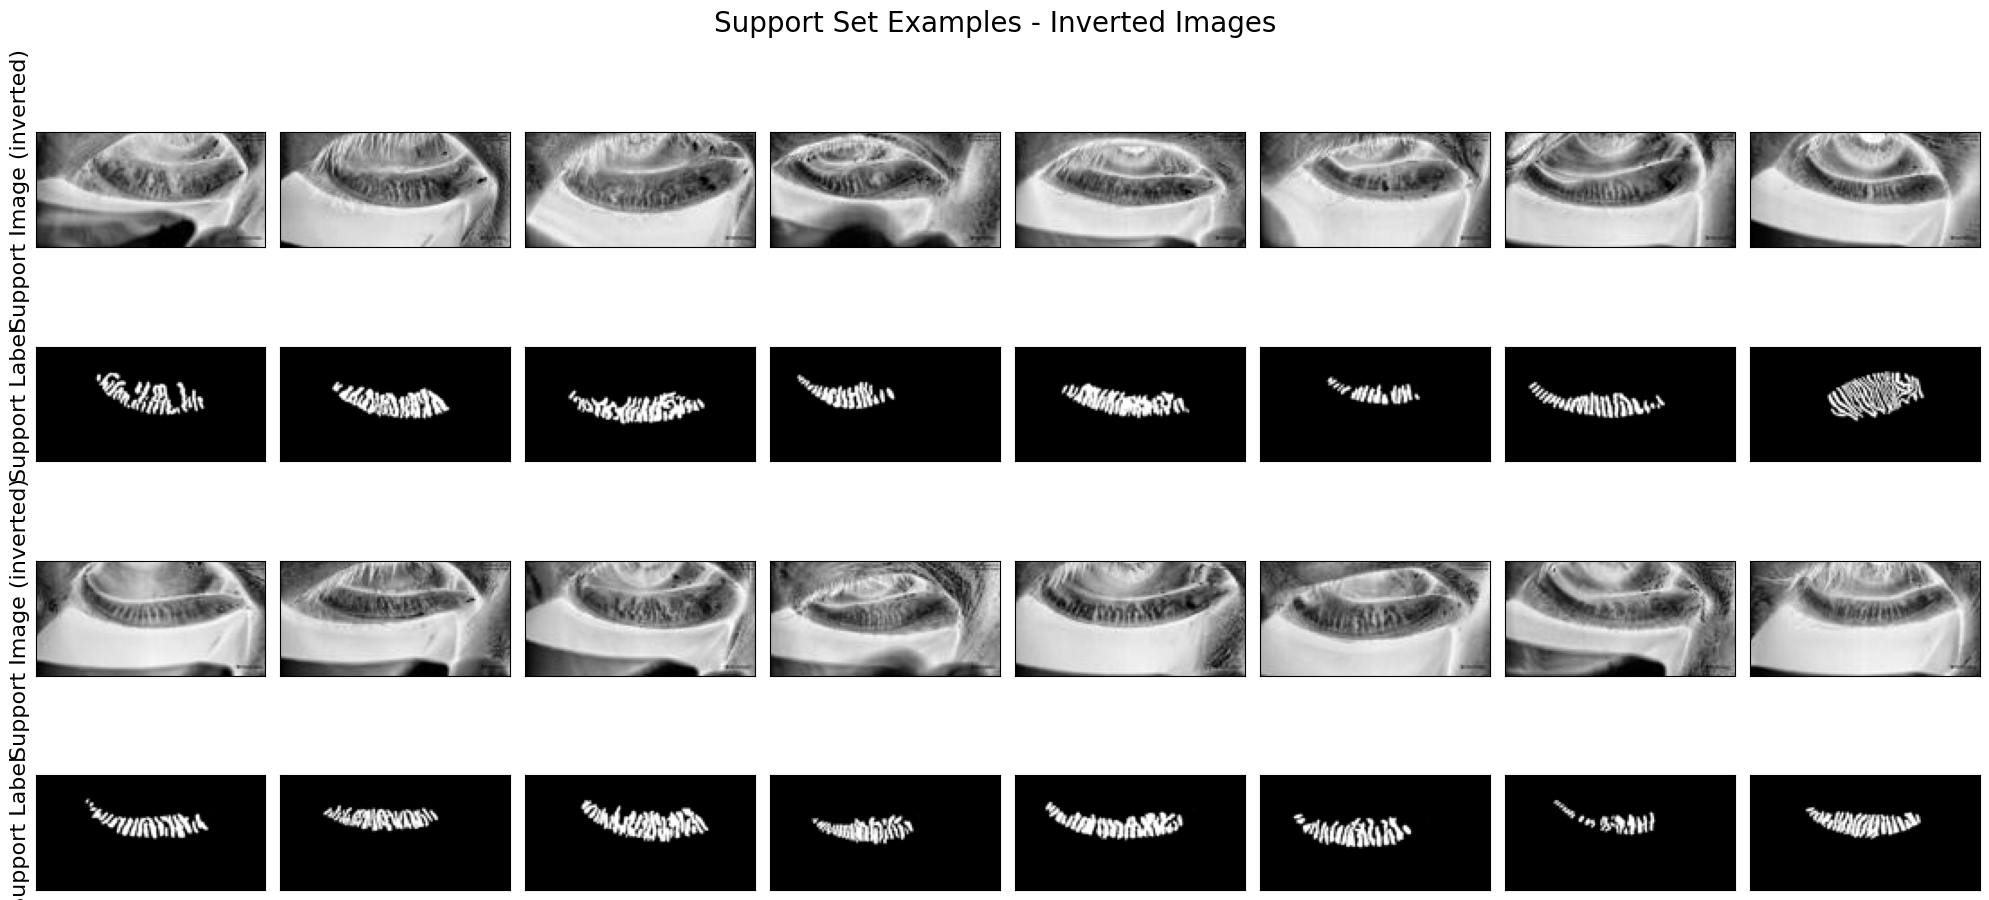

In [221]:
# invert images by intensity
support_images2 = 1 - support_images

# visualize support set
n_viz = 16
visualize_tensors({
    'Support Image (inverted)': support_images2[:n_viz],
    'Support Label': support_labels[:n_viz],
}, 8,  title='Support Set Examples - Inverted Images')

100%|██████████| 10/10 [00:35<00:00,  3.60s/it]


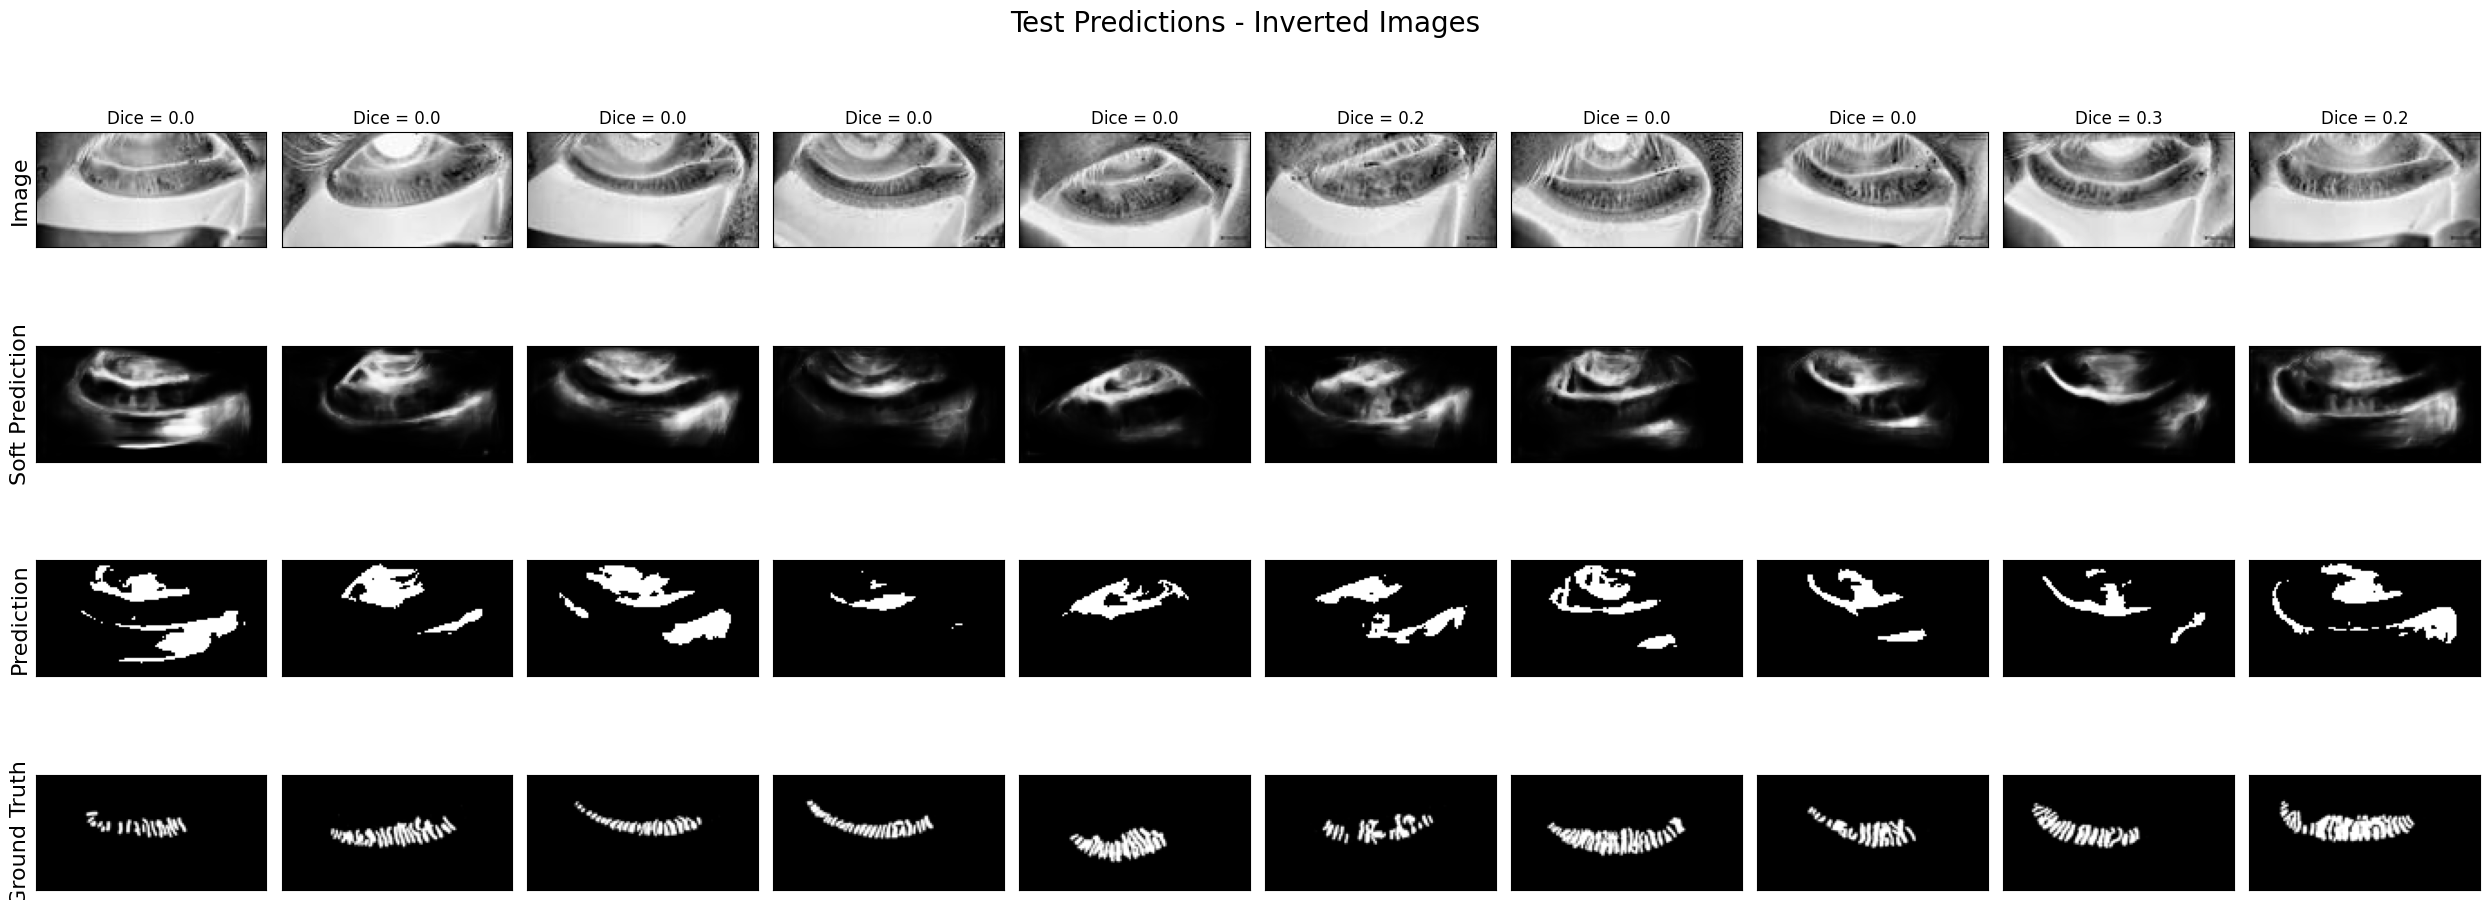

In [222]:
# run inference on inverted images (both the query image of interest, and support data)
n_predictions = 10

results = defaultdict(list)
idxs = np.random.permutation(len(d_test))[:n_predictions]

for i in tqdm(idxs):
    image, label = d_test[i]
    vals = inference(model, 1-image, label, support_images, support_labels)
    for k, v in vals.items():
        results[k].append(v)
    
scores = results.pop('score')    
visualize_tensors(results, col_names=[f'Dice = {100*s:.1f}' for s in scores], title='Test Predictions - Inverted Images', col_wrap=n_predictions)

In [223]:
# d_support = WBCDataset('JTSC', split='support', label='cytoplasm')
# d_test = WBCDataset('JTSC', split='test', label='cytoplasm')

# n_support = 64

# support_images, support_labels = zip(*itertools.islice(d_support, n_support))
# support_images = torch.stack(support_images).to(device)
# support_labels = torch.stack(support_labels).to(device)

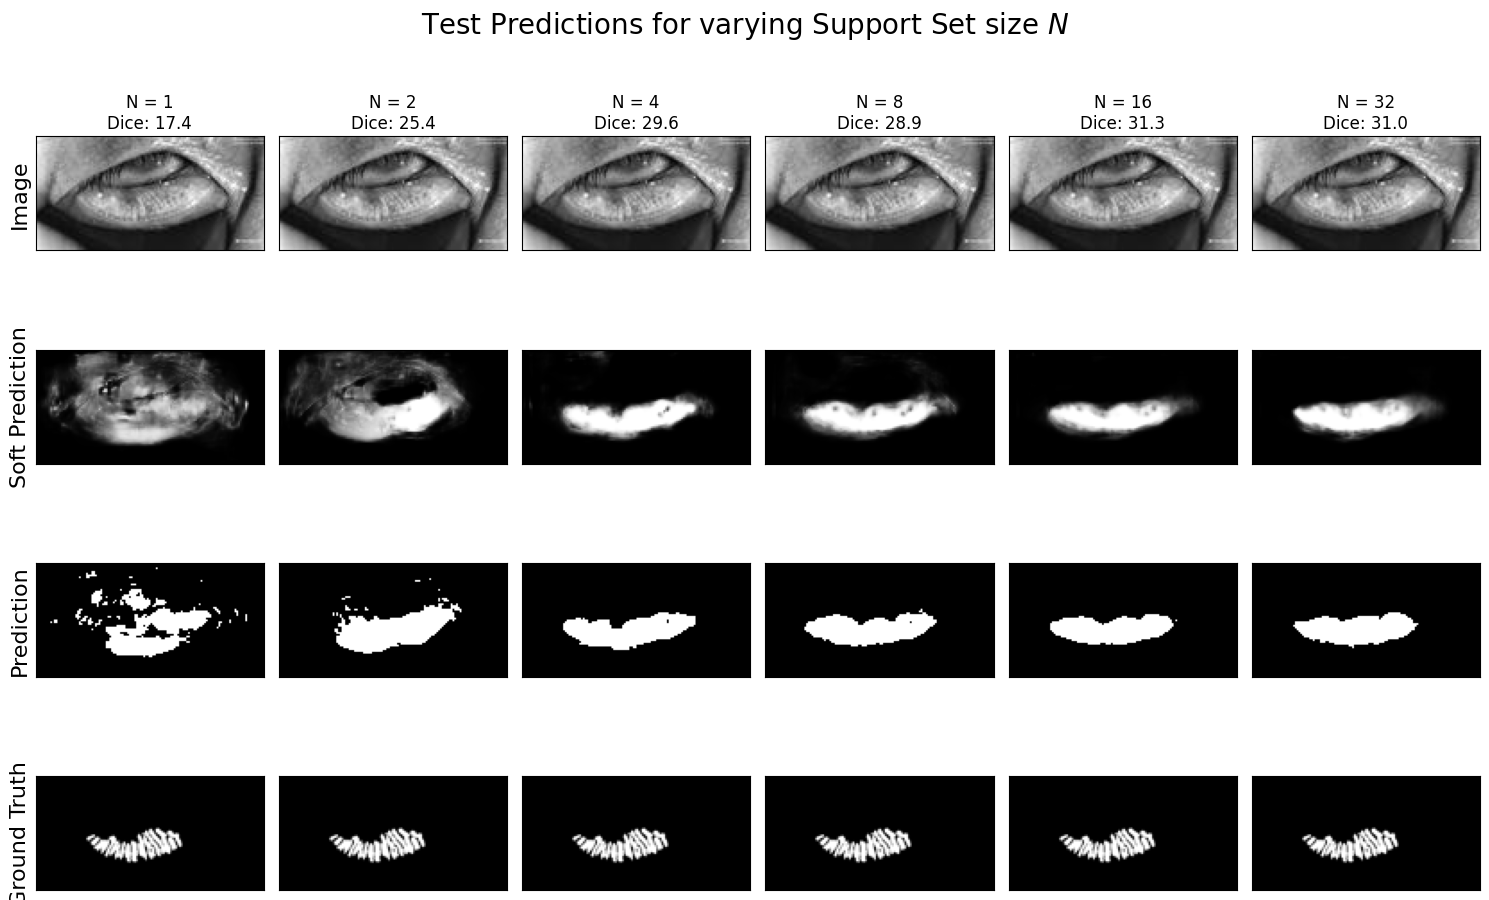

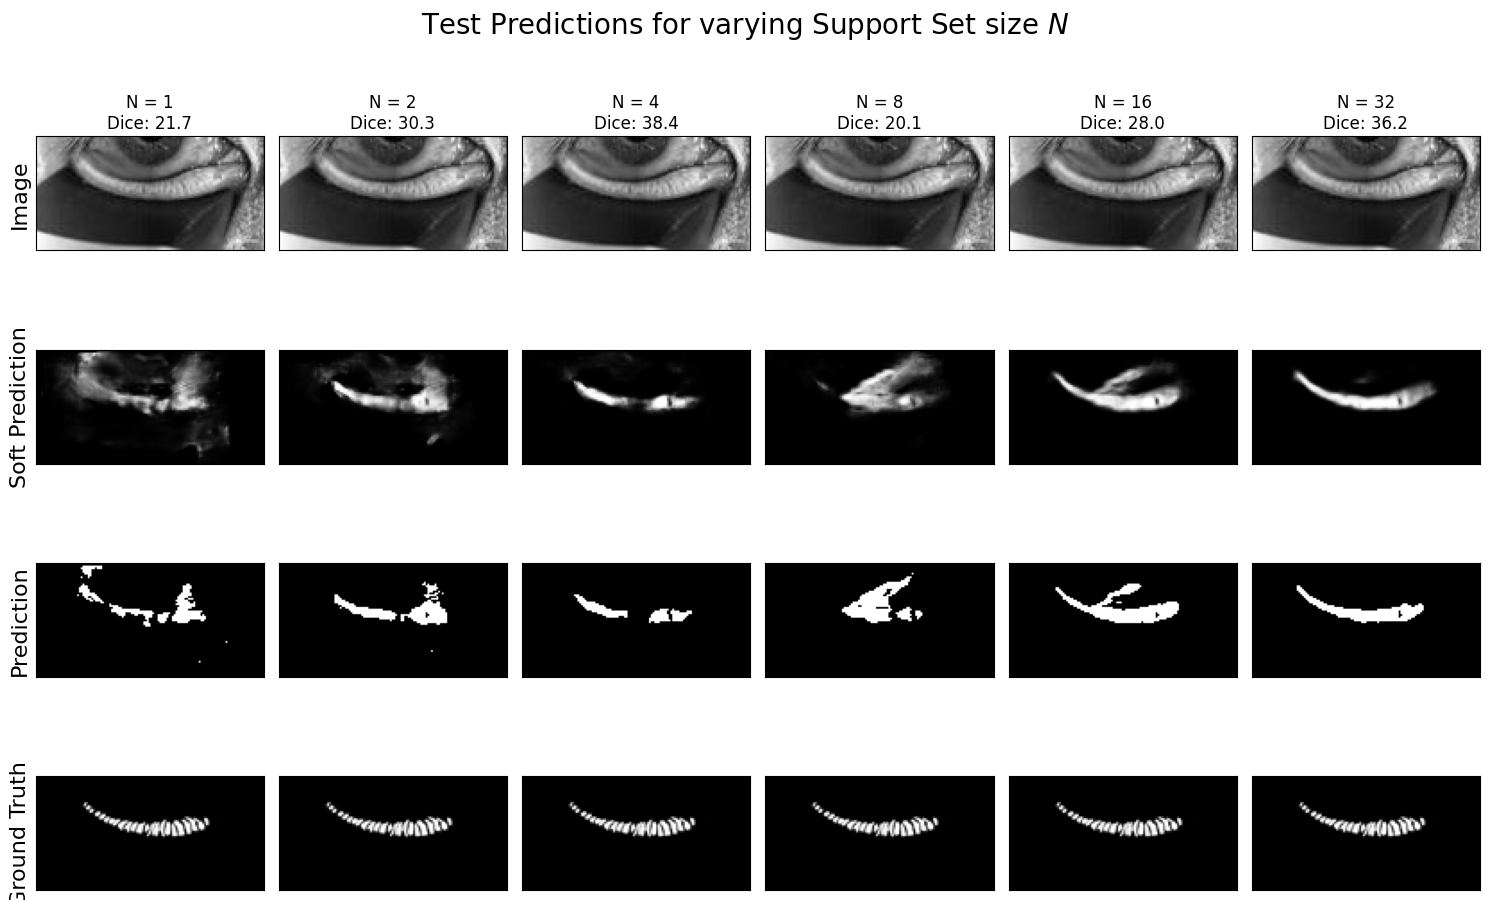

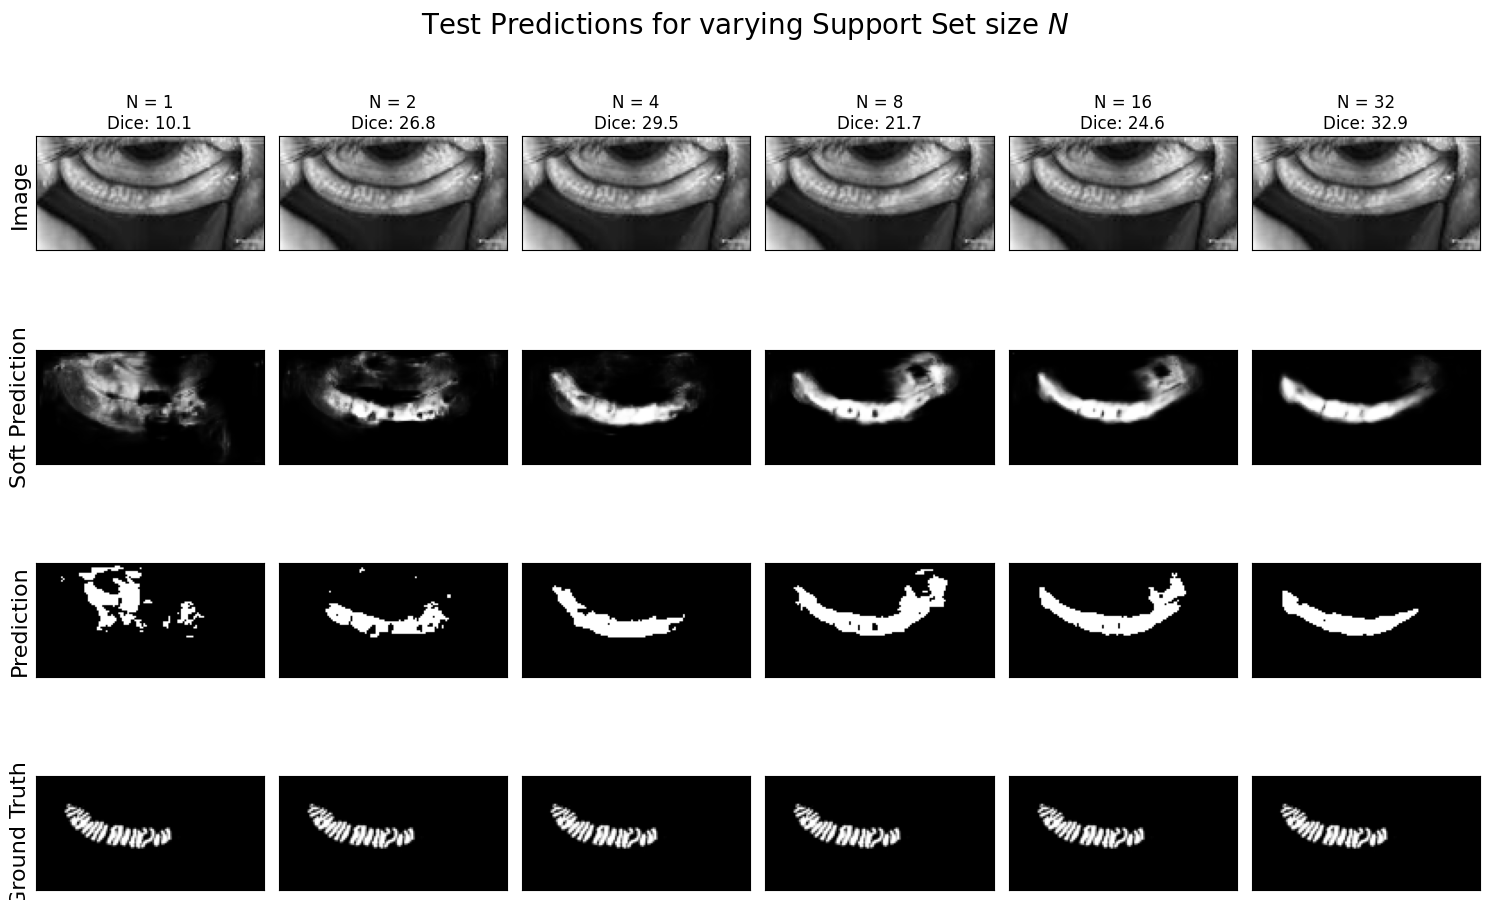

In [224]:
n_predictions = 3
support_set_sizes = [1, 2, 4, 8, 16,32]

idxs = np.random.permutation(len(d_test))[:n_predictions]

for i in idxs:
    results = defaultdict(list)
    for N in support_set_sizes:
        image, label = d_test[i]
        vals = inference(model, image, label, support_images[:N], support_labels[:N])
        for k, v in vals.items():
            results[k].append(v)
    
    # visualize for this entry for different support sizes
    scores = results.pop('score')    
    col_names = [f'N = {N}' for N in support_set_sizes]
    col_names = [col+f'\nDice: {100*score:.1f}' for col, score in zip(col_names, scores)]
    visualize_tensors(results, col_names=col_names, title='Test Predictions for varying Support Set size $N$', col_wrap=len(support_set_sizes))

In [225]:
# n_viz = 16
# visualize_tensors({
#     'Support Image': support_images[:n_viz],
#     'Support Label': support_labels[:n_viz],
# }, 8, title='Support Set Examples - Multi Label')

In [226]:
# prepare a function that will perform inference on all available labels
import torch.nn.functional as F

@torch.no_grad()
def inference_multi(model, image, label_onehot, support_images, support_labels_onehot):
    # get data
    n_labels = label_onehot.shape[0]
    image, label_onehot = image.to(device), label_onehot.to(device)

    # go through label
    all_logits = []
    soft_pred_onehot = []
    for k in range(n_labels):
        # extract the right label
        label = label_onehot[k:k+1]
        support_labels = support_labels_onehot[:,k:k+1]

        # run inference on this label
        logits = model(
            image[None],
            support_images[None],
            support_labels[None]
        )[0] # outputs are logits        
        soft_pred = torch.sigmoid(logits)
        soft_pred_onehot.append(soft_pred)

    # get multi-label score
    soft_pred_onehot = torch.stack(soft_pred_onehot)
    hard_pred = F.softmax(10*soft_pred_onehot,dim=0)
    scores = []
    for k in range(n_labels):
        score = dice_score(hard_pred[k], label_onehot[k])
        scores.append(score)

    # return the predictions and labels    
    return {'Image': image,
            'Soft Prediction': soft_pred_onehot,
            'Prediction': hard_pred,
            'Ground Truth': label_onehot,
            'score': np.mean(scores)}

In [227]:
# # Custom Dataset
# support_num=50
# original_list=sorted(glob("img/new_size_original/*.JPG"))
# eyelid_list=sorted(glob("img/new_size_glands/*.png"))

# # original_list=sorted(glob("./chaos/new_dcms/*.jpg"))
# # eyelid_list=sorted(glob("./chaos/new_pngs/*.png"))


# support_list= []
# support_eyelid_list= []
# d_test=[]
# d_support=[]


# for i in range(support_num):

#     if i< support_num-10:
        
#         org_img=cv2.imread(original_list[i],flags=cv2.IMREAD_GRAYSCALE)
#         eyelid_img=cv2.imread(eyelid_list[i],flags=cv2.IMREAD_GRAYSCALE)
    
#         support_list.append(torch.from_numpy(org_img.astype(np.float32)/255).unsqueeze(0))
#         support_eyelid_list.append(torch.from_numpy(eyelid_img.astype(np.float32)/255).unsqueeze(0))

#         d_support.append((torch.from_numpy(org_img.astype(np.float32)/255).unsqueeze(0),
#                             torch.from_numpy(eyelid_img.astype(np.float32)/255).unsqueeze(0)))  

#     else:

#         test_img= cv2.imread(original_list[i],flags=cv2.IMREAD_GRAYSCALE)
#         test_label_img= cv2.imread(eyelid_list[i],flags=cv2.IMREAD_GRAYSCALE) 
#         d_test.append((torch.from_numpy(test_img.astype(np.float32)/255).unsqueeze(0),
#                             torch.from_numpy(test_label_img.astype(np.float32)/255).unsqueeze(0)))  


# support_images=torch.stack(support_list,0).to(device)
# support_labels=torch.stack(support_eyelid_list,0).to(device)


100%|██████████| 10/10 [00:35<00:00,  3.56s/it]


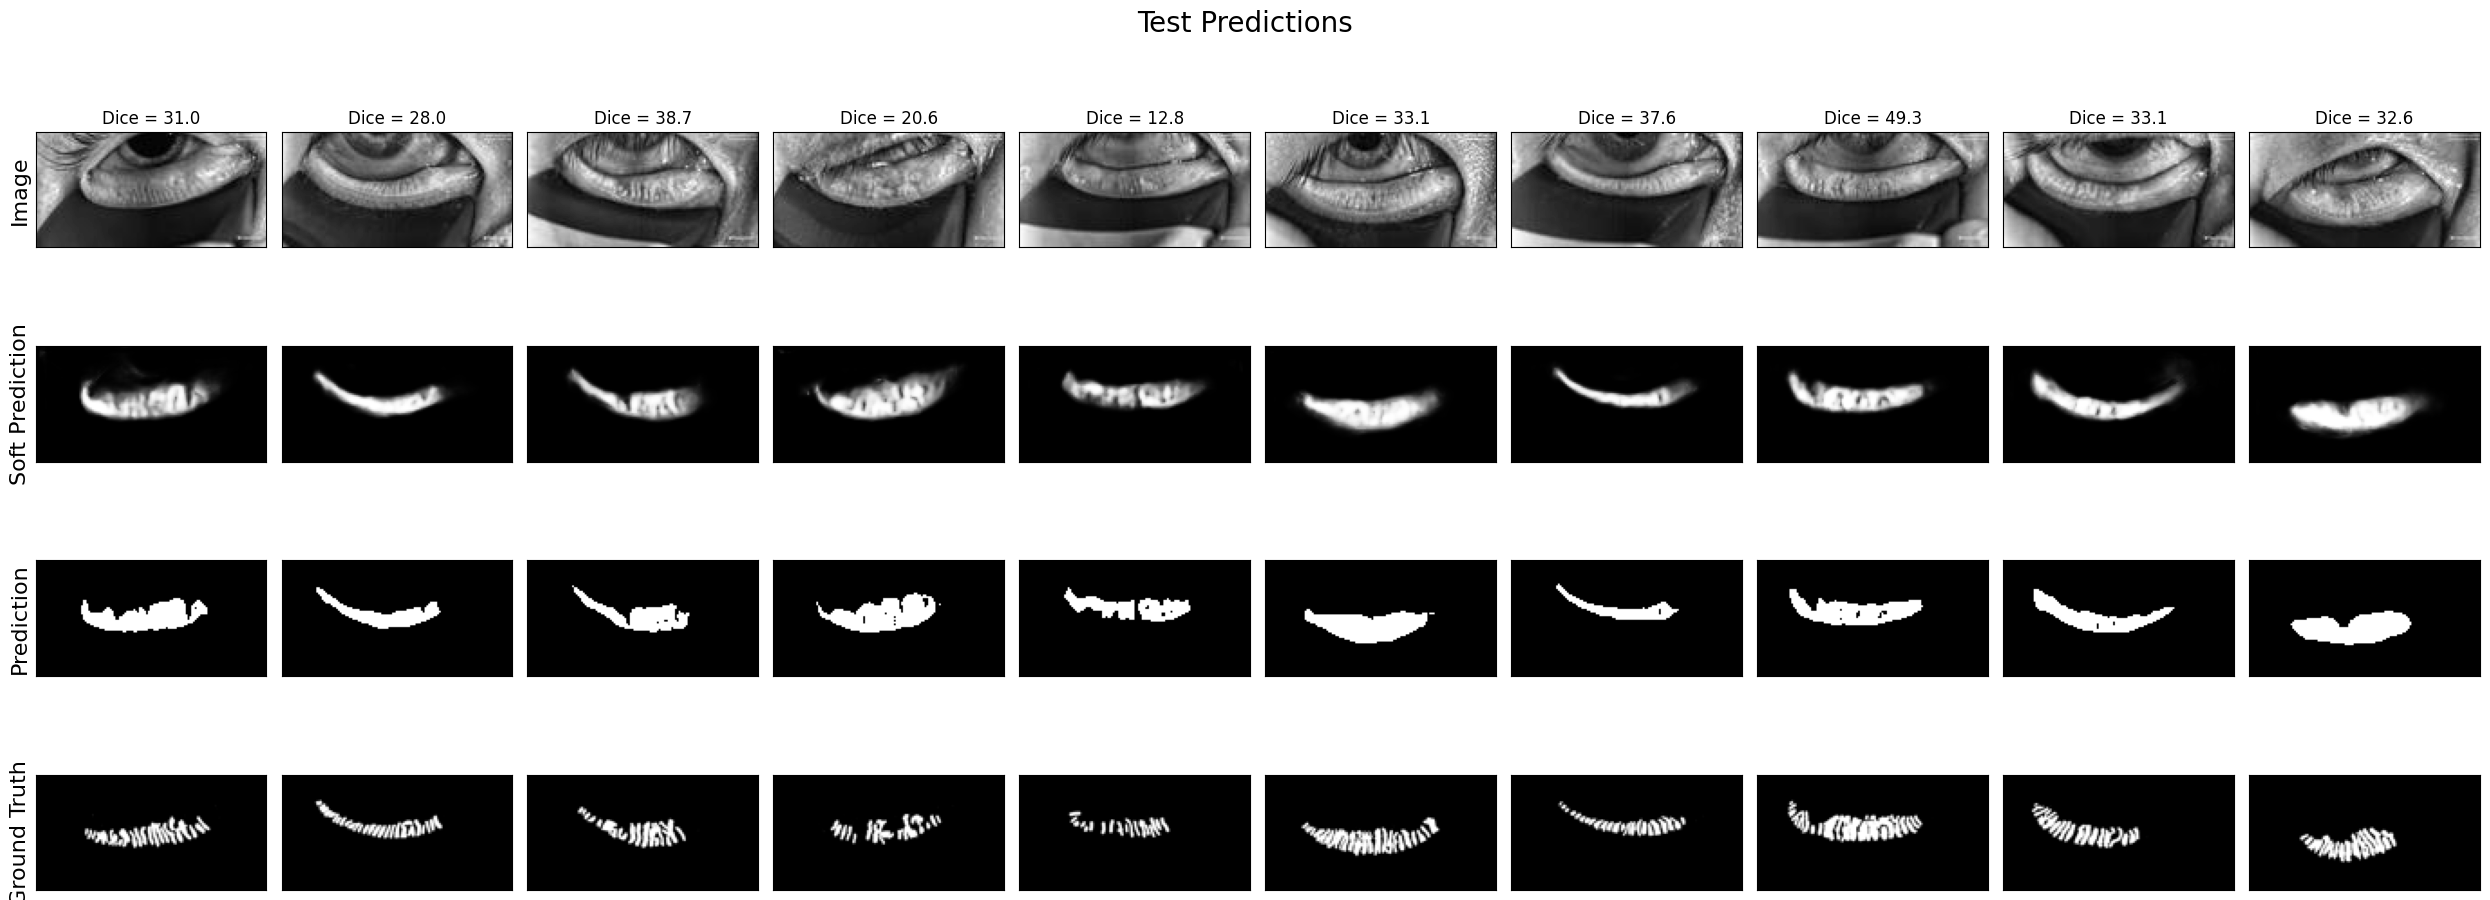

In [228]:

from collections import defaultdict

n_predictions = 10

results = defaultdict(list)

# compute inference and save predictions and metrics for n_predictions
idxs = np.random.permutation(len(d_test))[:n_predictions]

for i in tqdm(idxs):
    image, label = d_test[i]
    vals = inference(model, image, label, support_images, support_labels)
    for k, v in vals.items():
        results[k].append(v)
    
# visualize the results, along with their scores
scores = results.pop('score')    
visualize_tensors(results, 
                  col_names=[f'Dice = {100*s:.1f}' for s in scores], 
                  title='Test Predictions', 
                  col_wrap=n_predictions)

In [229]:
# helpful function to sample support data
support_size=8
def sample_support(seed):
    rng = np.random.default_rng(seed)
    idxs = rng.integers(0,len(d_support), size=support_size)
    support_images, support_labels = zip(*[d_support[i] for i in idxs])
    support_images = torch.stack(support_images).to(device)
    support_labels = torch.stack(support_labels).to(device)
    return support_images, support_labels

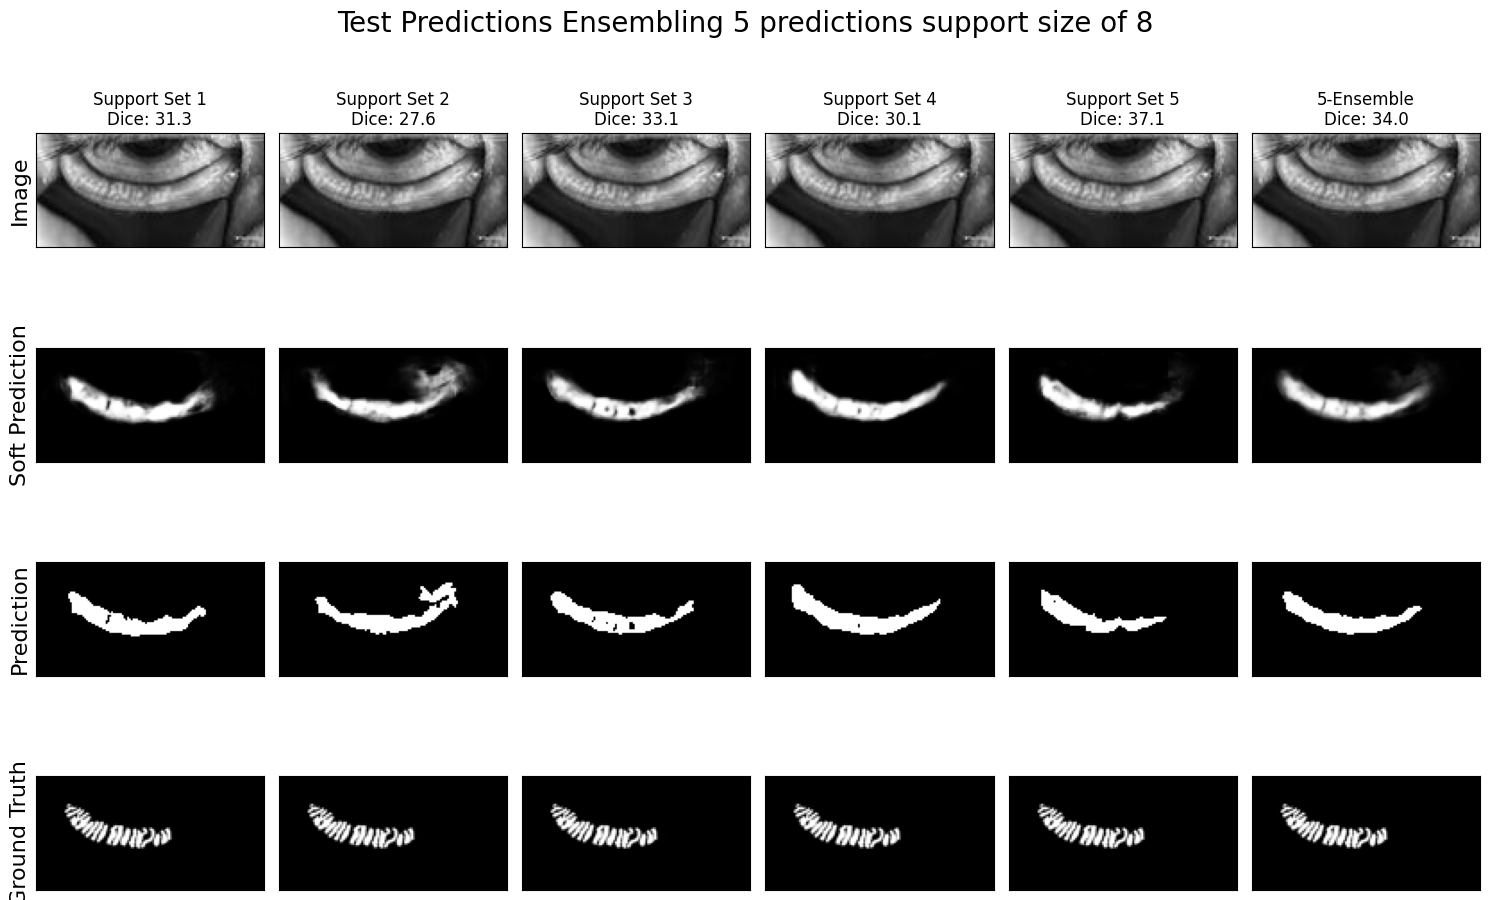

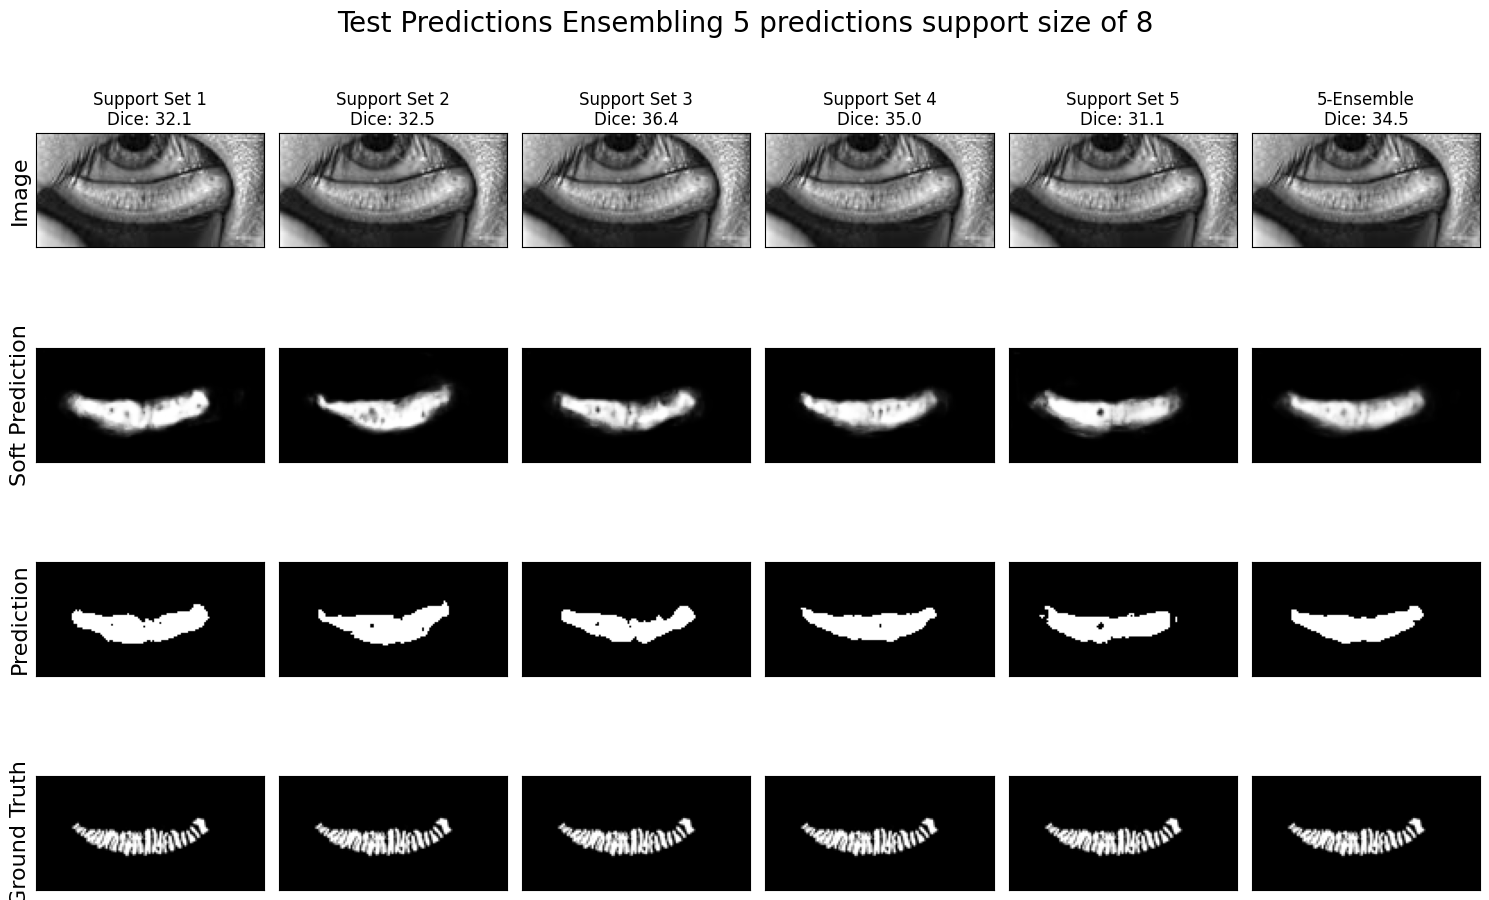

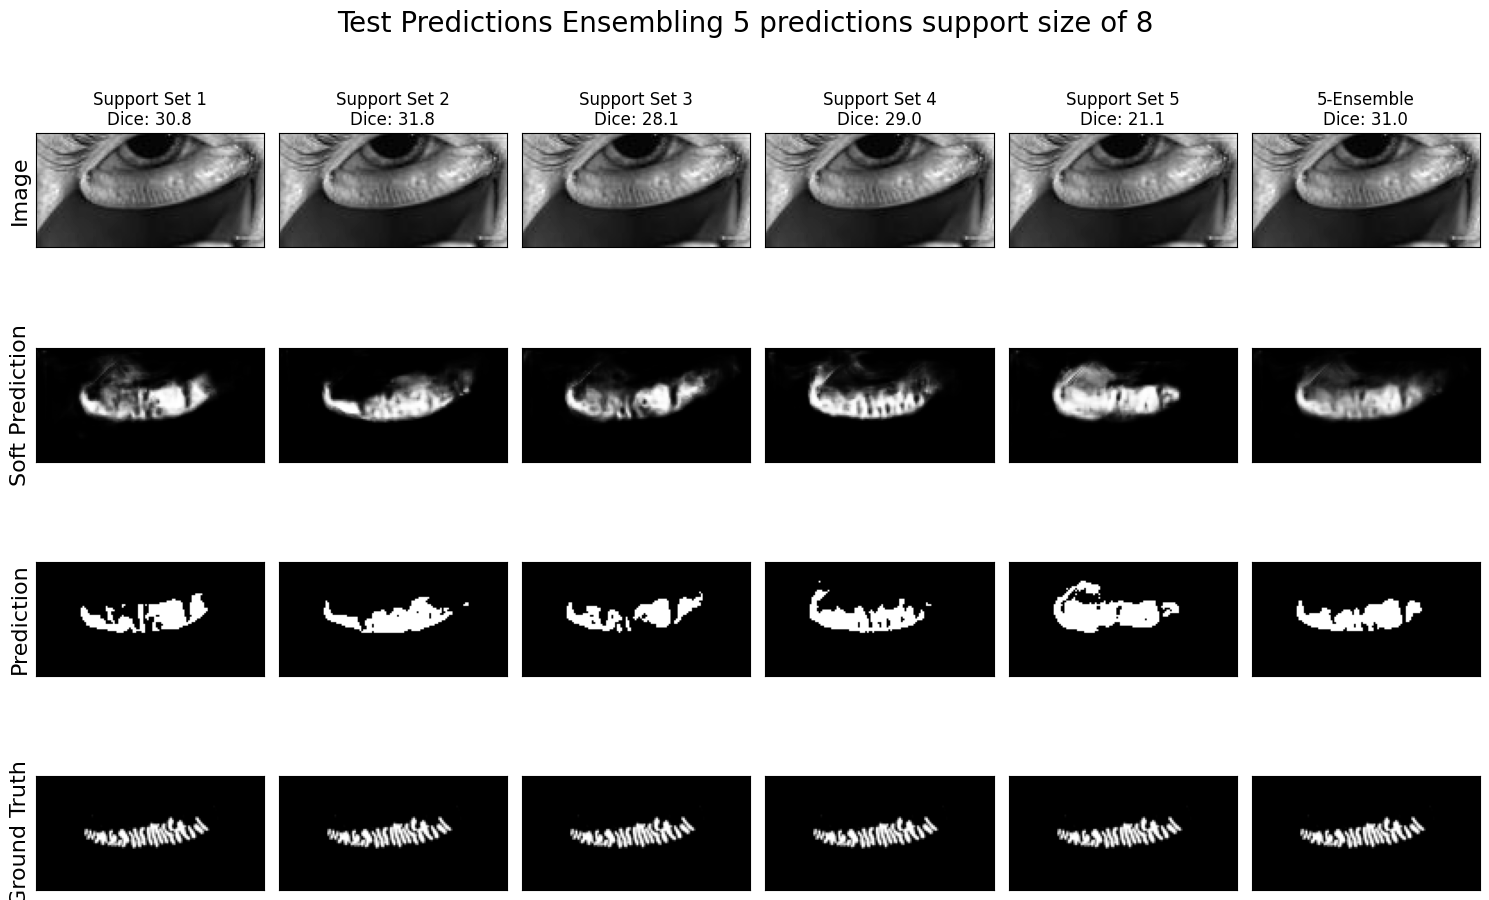

In [231]:
# get support data
# d_support = WBCDataset('JTSC', split='support', label='cytoplasm')
# d_test = WBCDataset('JTSC', split='test', label='cytoplasm')

# setup the number of predictions and ensembling 
support_size = 8
n_predictions = 3
n_ensemble = 5

# get various support sets
idxs = np.random.permutation(len(d_test))[:n_predictions]
seeds = range(n_ensemble)
supports = {
    seed: sample_support(seed)
    for seed in range(n_ensemble)
}

# go through the number of experiments
for i in idxs:

    # go through the number of predictions we will ensemble
    results = defaultdict(list)
    for j in range(n_ensemble):
        # get support set and query
        support_images, support_labels = sample_support(j)
        image, label = d_test[i]

        # perform inference
        vals = inference(model, image, label, support_images, support_labels)
        for k, v in vals.items():
            results[k].append(v)
    
    results['Image'].append(image)
    ensemble = torch.mean(torch.stack(results['Soft Prediction']), dim=0)
    results['Soft Prediction'].append(ensemble)
    results['Prediction'].append(ensemble.round())
    results['Ground Truth'].append(label)
    results['score'].append(dice_score(ensemble.round(), label.to(device)))
    
    scores = results.pop('score')  
    col_names = [f'Support Set {i+1}' for i in range(n_ensemble)] + [f'{n_ensemble}-Ensemble']
    col_names = [col+f'\nDice: {100*score:.1f}' for col, score in zip(col_names, scores)]
    
    visualize_tensors(results, 
                      col_names=col_names, 
                      title=f'Test Predictions Ensembling {n_ensemble} predictions support size of {support_size}', 
                      col_wrap=n_ensemble+1)

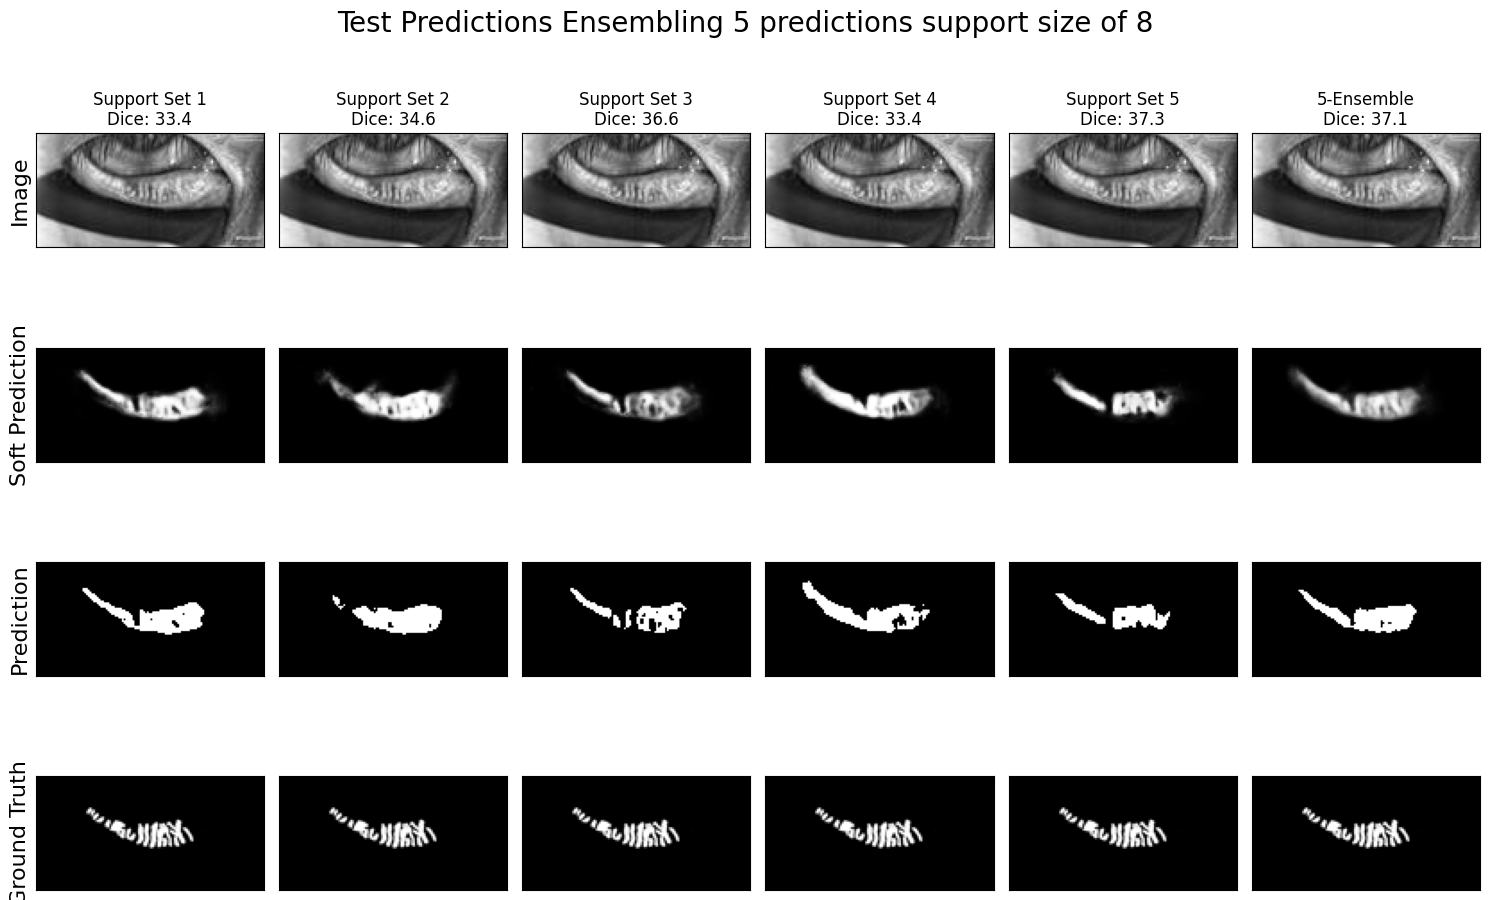

In [232]:
# Select a specific test image index (e.g., the first test image)
test_image_index = 0

# Get the specific test image and its label
image, label = d_test[test_image_index]

# Perform inference for all support sets
results = defaultdict(list)
for j in range(n_ensemble):
    support_images, support_labels = sample_support(j)
    vals = inference(model, image, label, support_images, support_labels)
    for k, v in vals.items():
        results[k].append(v)

# Calculate the ensemble prediction and Dice score
results['Image'].append(image)
ensemble = torch.mean(torch.stack(results['Soft Prediction']), dim=0)
results['Soft Prediction'].append(ensemble)
results['Prediction'].append(ensemble.round())
results['Ground Truth'].append(label)
results['score'].append(dice_score(ensemble.round(), label.to(device)))

# Visualization
scores = results.pop('score')
col_names = [f'Support Set {i+1}' for i in range(n_ensemble)] + [f'{n_ensemble}-Ensemble']
col_names = [col+f'\nDice: {100*score:.1f}' for col, score in zip(col_names, scores)]

visualize_tensors(results, 
                  col_names=col_names, 
                  title=f'Test Predictions Ensembling {n_ensemble} predictions support size of {support_size}', 
                  col_wrap=n_ensemble+1)
